<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/%08BP_hv3_7(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [1]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
TensorFlow version :  2.8.2
Keras version :  2.8.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [3]:
import numpy as np
from scipy import io

# 데이터 파일 불러z오기
train_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/train_shuffled_raw_v3.mat')
test_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [4]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [5]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [6]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [7]:
total_me = 0
total_std = 0

In [8]:
#parameter

batch_size = 1024
epochs = 500
lrate = 0.001

# SBP

## 1

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [10]:
model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2048      
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 8)                 0

In [11]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 5s 6ms/step - loss: 12108.7373 - val_loss: 12083.1494
Epoch 2/500
165/165 [==============================] - 1s 6ms/step - loss: 11637.2510 - val_loss: 11820.7109
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 10986.6836 - val_loss: 10323.6270
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 10120.5205 - val_loss: 9543.3779
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 9115.5508 - val_loss: 8782.1855
Epoch 6/500
165/165 [==============================] - 1s 6ms/step - loss: 8011.6777 - val_loss: 7866.6973
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 6860.2046 - val_loss: 7529.6230
Epoch 8/500
165/165 [==============================] - 1s 5ms/step - loss: 5708.4116 - val_loss: 4640.9468
Epoch 9/500
165/165 [==============================] - 1s 6ms/step - loss: 4608.9570 - val_loss: 4006.0273
Epoch 10/500
165/165 [========

In [12]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -2.048756819378884 
MAE:  7.601697294777297 
SD:  9.771747715672356


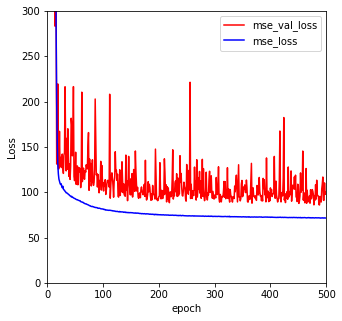

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [15]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                2048      
                                                                 
 batch_normalization_3 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_4 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 8)                

In [16]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 2s 6ms/step - loss: 12404.4834 - val_loss: 12321.2061
Epoch 2/500
165/165 [==============================] - 1s 5ms/step - loss: 12062.0752 - val_loss: 12019.2012
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 11657.2734 - val_loss: 11536.8623
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 11152.7295 - val_loss: 10584.5518
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 10559.5010 - val_loss: 9819.2402
Epoch 6/500
165/165 [==============================] - 1s 6ms/step - loss: 9891.8711 - val_loss: 8698.6230
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 9168.4346 - val_loss: 9155.9658
Epoch 8/500
165/165 [==============================] - 1s 6ms/step - loss: 8386.4795 - val_loss: 6980.6772
Epoch 9/500
165/165 [==============================] - 1s 5ms/step - loss: 7515.3203 - val_loss: 7142.1836
Epoch 10/500
165/165 [======

In [17]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.8723304507009264 
MAE:  7.573426818743259 
SD:  9.731394329978599


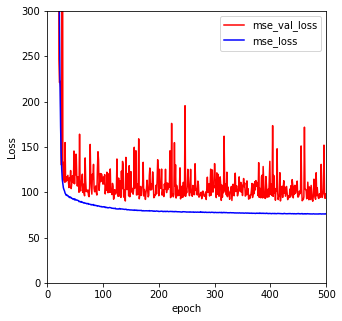

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [20]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                2048      
                                                                 
 batch_normalization_6 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_7 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 8)                

In [21]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 2s 8ms/step - loss: 12242.2246 - val_loss: 12188.7422
Epoch 2/500
165/165 [==============================] - 1s 5ms/step - loss: 11855.2295 - val_loss: 11749.3984
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 11313.9844 - val_loss: 11107.6377
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 10596.5059 - val_loss: 9980.5586
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 9745.9932 - val_loss: 9412.0840
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 8805.7725 - val_loss: 7698.8604
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 7813.6431 - val_loss: 6496.7075
Epoch 8/500
165/165 [==============================] - 1s 5ms/step - loss: 6807.9795 - val_loss: 5392.4097
Epoch 9/500
165/165 [==============================] - 1s 5ms/step - loss: 5820.9521 - val_loss: 4839.5938
Epoch 10/500
165/165 [========

In [22]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  3.7445963574363588 
MAE:  7.585457474398376 
SD:  9.435216235328273


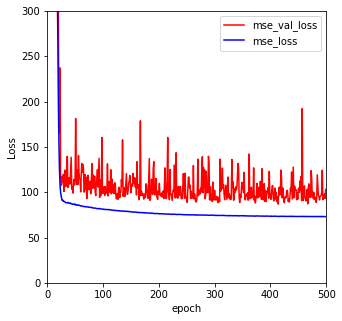

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [24]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.058830304214483764 
Ensemble_std:  9.646119426993076


# DBP

In [25]:
total_me = 0
total_std = 0

## 1

In [26]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [27]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                2048      
                                                                 
 batch_normalization_9 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_10 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 8)                

In [28]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 2s 6ms/step - loss: 3590.3677 - val_loss: 3690.4373
Epoch 2/500
165/165 [==============================] - 1s 5ms/step - loss: 3318.6860 - val_loss: 3408.3281
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 2977.6753 - val_loss: 2751.4497
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 2574.4783 - val_loss: 2372.3281
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 2134.0498 - val_loss: 1746.7018
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 1687.1464 - val_loss: 1154.9036
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 1260.5338 - val_loss: 1205.8855
Epoch 8/500
165/165 [==============================] - 1s 5ms/step - loss: 872.3168 - val_loss: 1230.3439
Epoch 9/500
165/165 [==============================] - 1s 5ms/step - loss: 565.5339 - val_loss: 1023.9561
Epoch 10/500
165/165 [=================

In [29]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.9595752618989815 
MAE:  4.337255360420766 
SD:  5.837284286192048


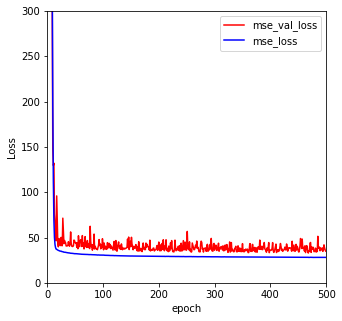

In [30]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [31]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [32]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                2048      
                                                                 
 batch_normalization_12 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_13 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 8)                

In [33]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 2s 6ms/step - loss: 3823.4409 - val_loss: 3737.8037
Epoch 2/500
165/165 [==============================] - 1s 5ms/step - loss: 3674.3965 - val_loss: 3612.2415
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 3553.3789 - val_loss: 3524.9102
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 3411.5308 - val_loss: 3189.1309
Epoch 5/500
165/165 [==============================] - 1s 6ms/step - loss: 3246.8745 - val_loss: 2887.3667
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 3063.5535 - val_loss: 2669.4883
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 2864.2415 - val_loss: 2431.8213
Epoch 8/500
165/165 [==============================] - 1s 6ms/step - loss: 2614.8735 - val_loss: 2553.0432
Epoch 9/500
165/165 [==============================] - 1s 5ms/step - loss: 2324.6318 - val_loss: 2375.0081
Epoch 10/500
165/165 [===============

In [34]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.2399119794613538 
MAE:  4.417541371072891 
SD:  5.854023916156944


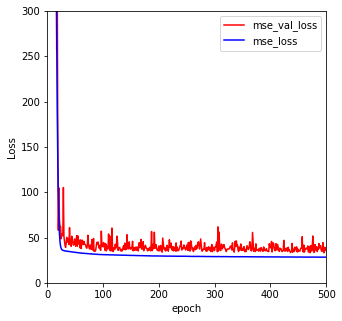

In [35]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [36]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(16, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [37]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                2048      
                                                                 
 batch_normalization_15 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_16 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 8)                

In [38]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 2s 6ms/step - loss: 3670.4236 - val_loss: 3673.4080
Epoch 2/500
165/165 [==============================] - 1s 5ms/step - loss: 3456.4609 - val_loss: 3070.6514
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 3199.0295 - val_loss: 2788.5657
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 2868.7131 - val_loss: 2708.8091
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 2482.9248 - val_loss: 2285.1345
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 2062.5679 - val_loss: 1672.0576
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 1657.5175 - val_loss: 1384.9075
Epoch 8/500
165/165 [==============================] - 1s 5ms/step - loss: 1279.7100 - val_loss: 1190.0056
Epoch 9/500
165/165 [==============================] - 1s 5ms/step - loss: 937.5019 - val_loss: 778.7426
Epoch 10/500
165/165 [=================

In [39]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.4729895282541208 
MAE:  4.500380747739948 
SD:  5.867787571426671


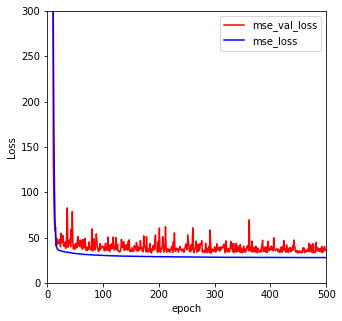

In [40]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [41]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  0.5844420819388311 
Ensemble_std:  5.853031924591888
